DataFit > Quadratic Equation

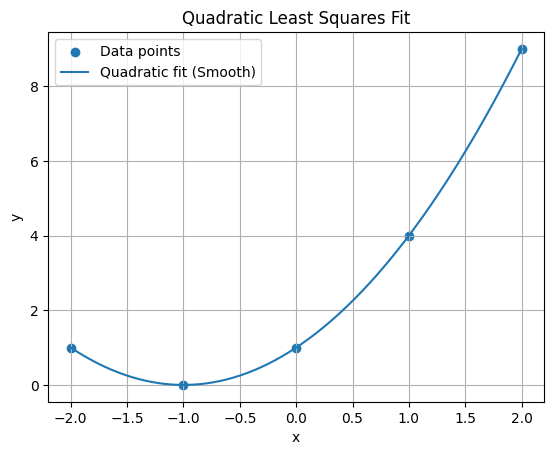

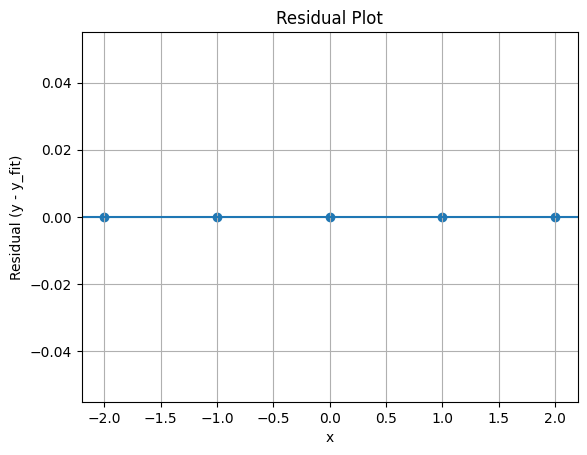

In [5]:
import matplotlib.pyplot as plt
import numpy as np


x = [-2, -1, 0, 1, 2]
y = [1, 0, 1, 4, 9]

a = 1.0
b = 2.0
c = 1.0

x_smooth = np.linspace(min(x), max(x), 200)
y_smooth = a*x_smooth**2 + b*x_smooth + c

y_fit = []
for xi in x:
    y_fit.append(a*xi*xi + b*xi + c)

residuals = []

for yi, yfi in zip(y, y_fit):
    residuals.append(yi - yfi)

plt.scatter(x, y, label="Data points")
# plt.plot(x, y_fit, label="Quadratic fit")
plt.plot(x_smooth, y_smooth, label="Quadratic fit (Smooth)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Least Squares Fit")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(x, residuals)
plt.axhline(0)   # zero error line

plt.xlabel("x")
plt.ylabel("Residual (y - y_fit)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()



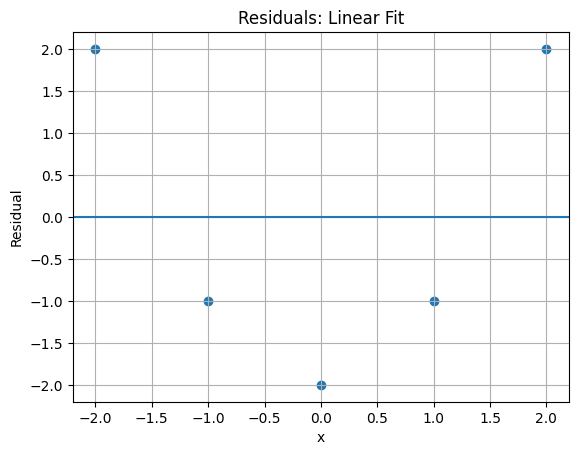

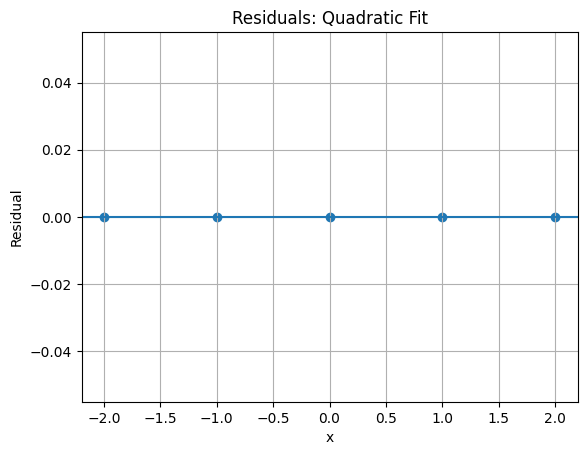

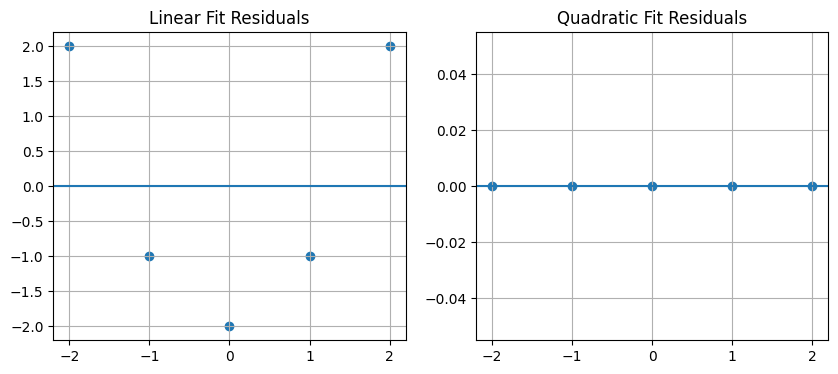

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([-2, -1, 0, 1, 2])
y = np.array([1, 0, 1, 4, 9])

a, b, c = 1.0, 2.0, 1.0
y_quad = a*x**2 + b*x + c


res_quad = y - y_quad

m, c_lin = np.polyfit(x, y, 1)
y_lin = m*x + c_lin
res_lin = y - y_lin


plt.figure()
plt.scatter(x, res_lin)
plt.axhline(0)
plt.xlabel("x")
plt.ylabel("Residual")
plt.title("Residuals: Linear Fit")
plt.grid(True)
plt.show()


plt.figure()
plt.scatter(x, res_quad)
plt.axhline(0)
plt.xlabel("x")
plt.ylabel("Residual")
plt.title("Residuals: Quadratic Fit")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x, res_lin)
plt.axhline(0)
plt.title("Linear Fit Residuals")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(x, res_quad)
plt.axhline(0)
plt.title("Quadratic Fit Residuals")
plt.grid(True)

plt.show()



C:\Users\aksha\AppData\Local\Temp\ipykernel_15968\2951093765.py:15: RankWarning: Polyfit may be poorly conditioned
  y_poly5 = np.polyfit(x, y, 5)


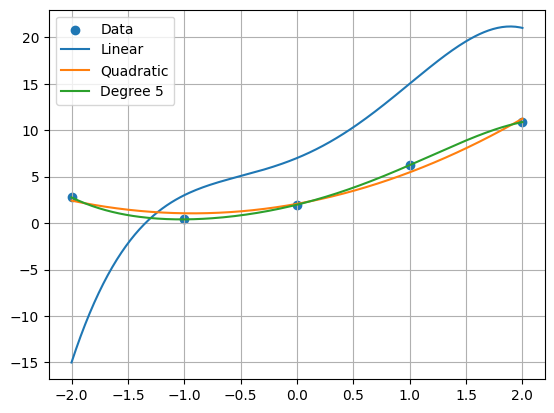

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
y_true = x**2 + 2*x + 1
noise = np.random.normal(0, 1.0, size=len(x))
y = y_true + noise

y_line = np.polyfit(x, y, 1)
y1 = np.polyval(y_line, x)

y_quad = np.polyfit(x, y, 2)
y2 = np.polyval(y_quad, x)

y_poly5 = np.polyfit(x, y, 5)
y5 = np.polyval(y_poly5, x)


plt.scatter(x, y, label="Data")

x_smooth = np.linspace(min(x), max(x), 200)

plt.plot(x_smooth, np.polyval(y_lin, x_smooth), label="Linear")
plt.plot(x_smooth, np.polyval(y_quad, x_smooth), label="Quadratic")
plt.plot(x_smooth, np.polyval(y_poly5, x_smooth), label="Degree 5")

plt.legend()
plt.grid(True)
plt.show()



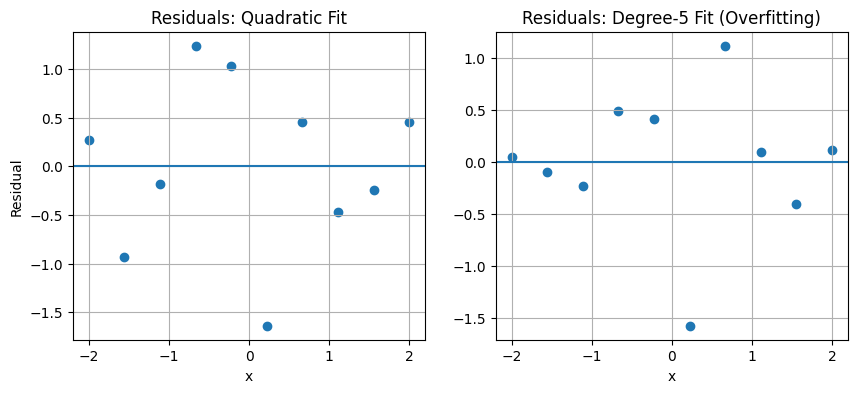

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x=np.linspace(-2,2,10)
y_true = x**2 + 2*x + 1
noise = np.random.normal(0,1.0,size=len(x))
y = y_true + noise


coef_quad = np.polyfit(x, y, 2)
y_quad = np.polyval(coef_quad, x)
res_quad = y - y_quad


coef_5 = np.polyfit(x, y, 5)
y_5 = np.polyval(coef_5, x)
res_5 = y - y_5


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x, res_quad)
plt.axhline(0)
plt.title("Residuals: Quadratic Fit")
plt.xlabel("x")
plt.ylabel("Residual")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(x, res_5)
plt.axhline(0)
plt.title("Residuals: Degree-5 Fit (Overfitting)")
plt.xlabel("x")
plt.grid(True)

plt.show()


Train vs Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.linspace(-2, 2, 20)
y_true = x**2 + 2*x + 1
noise = np.random.normal(0, 1.0, size=len(x))
y = y_true + noise

split = int(0.7 * len(x))

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

coef_lin = np.polyfit(x_train, y_train, 1)

coef_quad = np.polyfit(x_train, y_train, 2)

coef_5 = np.polyfit(x_train, y_train, 5)

def mse(x, y, coef):
    y_pred = np.polyval(coef, x)
    return np.mean((y-y_pred)**2)


models = {
    "Linear" : coef_lin,
    "Quadratic" : coef_quad,
    "Degree-5" : coef_5
}


for name, coef in models.items():
    train_error = mse(x_train, y_train, coef)
    test_error = mse(x_test, y_test, coef)
    print(f"{name:10s} | Train error: {train_error: .2f} | Test error: {test_error:.2f}")



Linear     | Train error:  1.36 | Test error: 18.85
Quadratic  | Train error:  0.62 | Test error: 2.13
Degree-5   | Train error:  0.45 | Test error: 5274.62


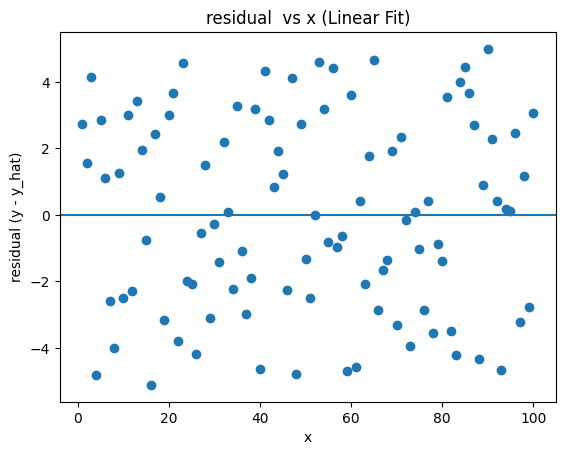

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:/Users/aksha/Desktop/CyberSecurityProjects/Data/residual.csv", delimiter=",", skiprows=1)

x = data[:,0]
residuals = data[:,3]

plt.axhline(0)
plt.scatter(x, residuals)
plt.xlabel("x")
plt.ylabel("residual (y - y_hat)")
plt.title("residual  vs x (Linear Fit)")
plt.show()

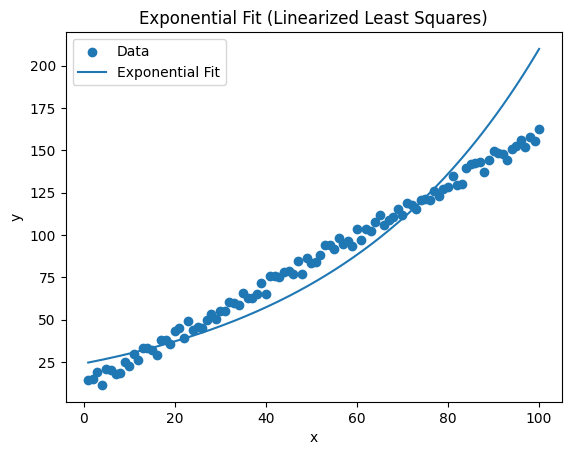

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:/Users/aksha/Desktop/CyberSecurityProjects/Data/raw_sensor_data.csv", delimiter=",", skiprows=1)
x = data[:,0]
y = data[:,1]

A = 24.075439
B = 0.021656

x_fit = np.linspace(min(x), max(x), 200)
y_fit = A * np.exp(B * x_fit)

plt.scatter(x, y, label="Data")
plt.plot(x_fit, y_fit, label="Exponential Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Exponential Fit (Linearized Least Squares)")
plt.show()


Linear Vs Quadratic Fit

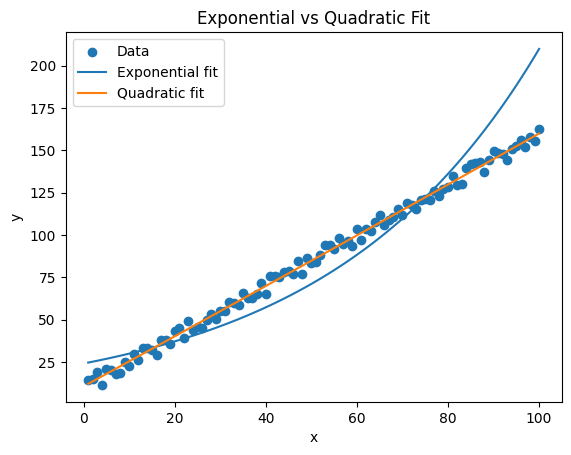

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:/Users/aksha/Desktop/CyberSecurityProjects/Data/raw_sensor_data.csv", delimiter=",", skiprows=1)
x = data[:,0]
y = data[:,1]

A = 24.075439
B = 0.021656

quad_coef = np.polyfit(x, y, 2)
y_quad = np.polyval(quad_coef, x)

y_exp = A * np.exp(B * x)

plt.scatter(x, y, label="Data")
plt.plot(x, y_exp, label="Exponential fit")
plt.plot(x, y_quad, label="Quadratic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Exponential vs Quadratic Fit")
plt.show()


Linear vs Quadratic Fit - Residual

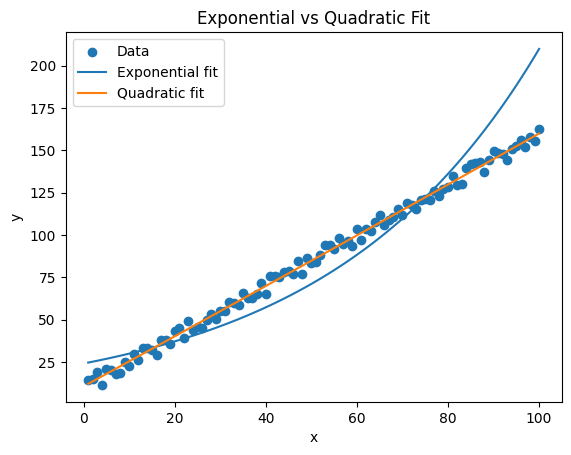

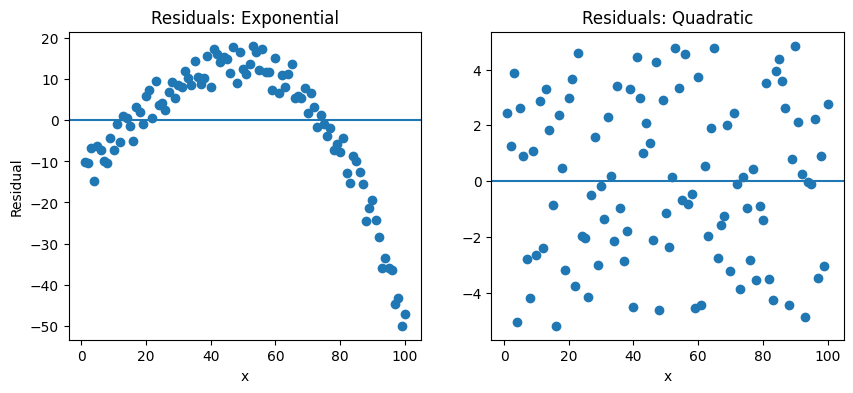

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:/Users/aksha/Desktop/CyberSecurityProjects/Data/raw_sensor_data.csv", delimiter=",", skiprows=1)
x = data[:,0]
y = data[:,1]

A = 24.075439
B = 0.021656

quad_coef = np.polyfit(x, y, 2)
y_quad = np.polyval(quad_coef, x)

y_exp = A * np.exp(B * x)

res_exp = y - y_exp
res_quad = y - y_quad

plt.scatter(x, y, label="Data")
plt.plot(x, y_exp, label="Exponential fit")
plt.plot(x, y_quad, label="Quadratic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Exponential vs Quadratic Fit")
plt.show()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x, res_exp)
plt.axhline(0)
plt.title("Residuals: Exponential")
plt.xlabel("x")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.scatter(x, res_quad)
plt.axhline(0)
plt.title("Residuals: Quadratic")
plt.xlabel("x")

plt.show()
